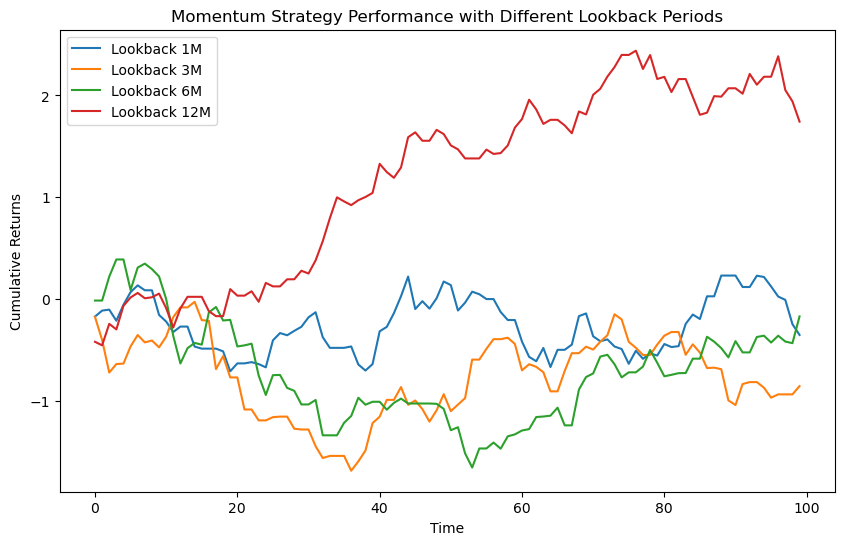

Lookback Period 1M: Sharpe Ratio = -3.29
Lookback Period 3M: Sharpe Ratio = -6.73
Lookback Period 6M: Sharpe Ratio = -5.14
Lookback Period 12M: Sharpe Ratio = 4.53


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameter definition
lookback_periods = [1, 3, 6, 12]  # Different lookback periods to evaluate
number_of_positions = 10
holding_period = 6
long_only = False

# Dummy paths for data files
path_stock_returns_signal = '../data/processed/stock_returns_signal'
path_stock_returns_holding_period = '../data/processed/stock_returns_holding_period'

# Dummy function for signal calculation (replace with actual implementation if available)
def signal_calculation(*args, **kwargs):
    print("Signal calculation would happen here.")

# Load data
data_returns_signal = {}
for lookback in lookback_periods:
    # Replace with actual data loading logic
    data_returns_signal[lookback] = pd.DataFrame(np.random.randn(100, 10))

# Strategy Evaluation Function
def evaluate_momentum_strategy(lookback_period, long_only=True):
    """
    Evaluate a momentum strategy with given parameters.
    """
    # Calculate signals
    signals = data_returns_signal[lookback_period]

    # Determine stock weights based on the signals
    # Sort stocks based on signal strength and assign weights
    if long_only:
        weights = signals.rank(ascending=False).le(number_of_positions).astype(float) / number_of_positions
    else:
        weights = (signals.rank(ascending=False).le(number_of_positions).astype(float) - signals.rank(ascending=True).le(number_of_positions).astype(float)) / number_of_positions

    # Load returns for the holding period
    # Replace with actual data loading logic
    stock_returns_holding = pd.DataFrame(np.random.randn(100, 10))

    # Calculate portfolio returns
    portfolio_returns = (weights * stock_returns_holding).sum(axis=1)

    return portfolio_returns

# Evaluate different momentum strategies and visualize
strategy_results = {}
plt.figure(figsize=(10, 6))

for lookback in lookback_periods:
    returns = evaluate_momentum_strategy(lookback, long_only)
    strategy_results[lookback] = returns.cumsum()
    plt.plot(strategy_results[lookback], label=f'Lookback {lookback}M')

plt.title('Momentum Strategy Performance with Different Lookback Periods')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Summary statistics
for lookback, returns in strategy_results.items():
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(12)  # Annualized Sharpe Ratio
    print(f"Lookback Period {lookback}M: Sharpe Ratio = {sharpe_ratio:.2f}")
